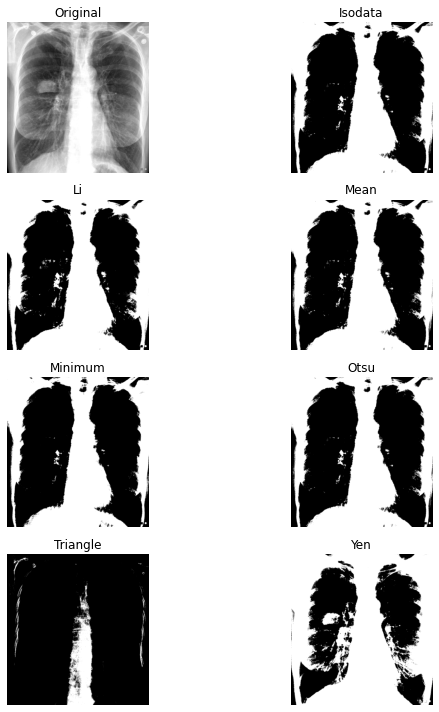

In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt
from skimage import io as sk_io, color as sk_col, morphology as sk_mm
from skimage.filters import try_all_threshold

%matplotlib inline

# Load the image from the source file
image_file = "./carcinoma_lungs.jpeg"
image = sk_io.imread(image_file)

# Convert to grayscale so we only have one channel
bw_image = sk_col.rgb2gray(image)

fig, ax = try_all_threshold(bw_image, figsize=(10, 10), verbose=False)
plt.show()

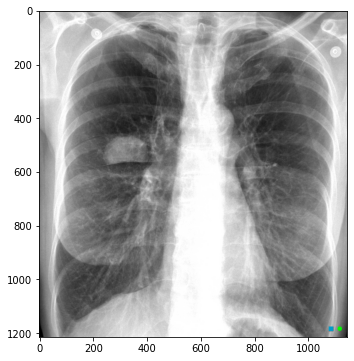

In [3]:
from skimage import io as sk_io
from skimage.filters import threshold_otsu
from matplotlib import pyplot as plt
%matplotlib inline

# Load the image from the source file
planes_image_file = "./carcinoma_lungs.jpeg"
planes_image = sk_io.imread(planes_image_file)

fig = plt.figure(figsize=(6,6))
plt.imshow(planes_image)
plt.show()

[[0 1 0]
 [1 1 1]
 [0 1 0]]


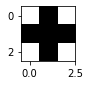

In [3]:
struct_element = sk_mm.selem.diamond(1)
print(struct_element)

# Display it
fig = plt.figure(figsize=(1,1))
plt.imshow(struct_element, cmap="binary")
plt.show()

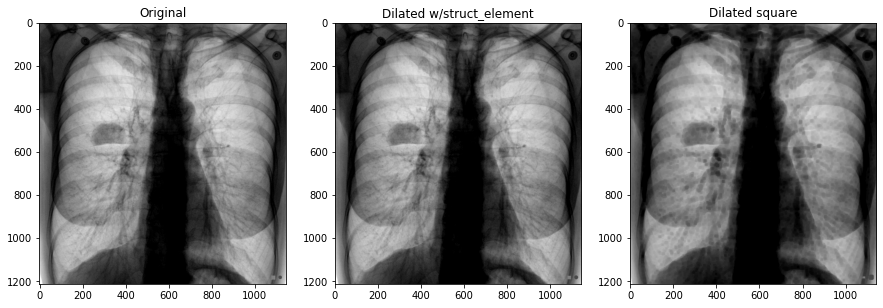

In [12]:
from skimage.morphology import square

#Apply dilation
dilated_struct = sk_mm.dilation(bw_image, struct_element)
dilated_square = sk_mm.dilation(bw_image, square(10))

# Display it
fig = plt.figure(figsize=(15, 10))

# Plot original image
a=fig.add_subplot(1, 3, 1)
plt.imshow(bw_image, cmap="binary")
a.set_title("Original")

# Plot dilated image
a=fig.add_subplot(1, 3, 2)
plt.imshow(dilated_struct, cmap="binary")
a.set_title("Dilated w/struct_element")

# Plot dilated image
a=fig.add_subplot(1, 3, 3)
plt.imshow(dilated_square, cmap="binary")
a.set_title("Dilated square")

plt.show()

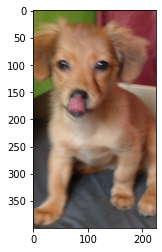

In [21]:
import cv2

# Load the image from the source file
image = cv2.imread("./dog.jpg")

scale_percent = 10
width = int(image.shape[1] * scale_percent / 100)
height = int(image.shape[0] * scale_percent / 100)
dim = (width, height)

# resize image
resized = cv2.resize(image, dim, interpolation = cv2.INTER_AREA)

%matplotlib inline

plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))

TypeError: Image data of dtype <U7 cannot be converted to float

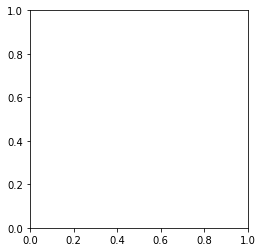

In [26]:
image = cv2.imread("./dog.jpg",0)
equ = cv2.equalizeHist(image)
res = np.hstack((image, equ))
cv2.imwrite("res.png",res)
plt.imshow("res.png")